In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [100]:
df = pd.read_csv('canada_per_capita_income.csv')
df

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


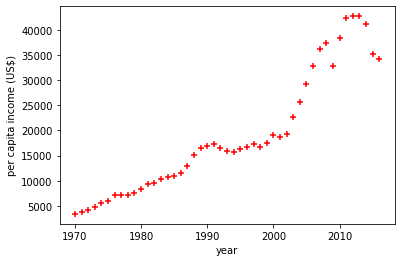

In [101]:
%matplotlib inline

plt.xlabel('year')
plt.ylabel('per capita income (US$)')

plt.scatter(df.year, df.income, color='red', marker='+')

In [102]:
rg = linear_model.LinearRegression()
rg.fit(df[['year']],df.income)

LinearRegression()

In [103]:
x = list(range(2020, 2030))
predictions = rg.predict(pd.DataFrame({'year': x}))
predictions

array([41288.69409442, 42117.15916964, 42945.62424486, 43774.08932009,
       44602.55439531, 45431.01947053, 46259.48454575, 47087.94962098,
       47916.4146962 , 48744.87977142])

In [104]:
for year, prediction in zip(x, predictions):
    print(f"Year: {year}, Prediction: {prediction}")

Year: 2020, Prediction: 41288.69409441762
Year: 2021, Prediction: 42117.15916964039
Year: 2022, Prediction: 42945.624244862935
Year: 2023, Prediction: 43774.08932008571
Year: 2024, Prediction: 44602.554395308485
Year: 2025, Prediction: 45431.01947053103
Year: 2026, Prediction: 46259.4845457538
Year: 2027, Prediction: 47087.94962097658
Year: 2028, Prediction: 47916.414696199354
Year: 2029, Prediction: 48744.879771421896


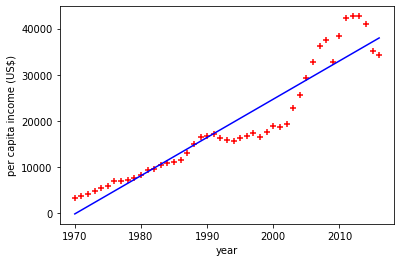

In [105]:
%matplotlib inline

plt.xlabel('year')
plt.ylabel('per capita income (US$)')

plt.scatter(df.year, df.income, color='red', marker='+')
plt.plot(df.year, rg.predict(df[['year']]), color='blue')

In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['year']], df['income'], test_size=0.2, random_state=42)
X_test

,year
27,1997
39,2009
26,1996
43,2013
24,1994
36,2006
12,1982
19,1989
4,1974
25,1995


In [107]:
# Fit the model on the training data
rg.fit(X_train, y_train)

LinearRegression()

In [108]:
# Predict on the testing data
test_predictions = rg.predict(X_test)

In [109]:
# Calculate R-squared score on the testing data
r2 = r2_score(y_test, test_predictions)
r2

0.8751771396846304